In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./diamonds.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
x = data[['price']]

# Visualizing the Data

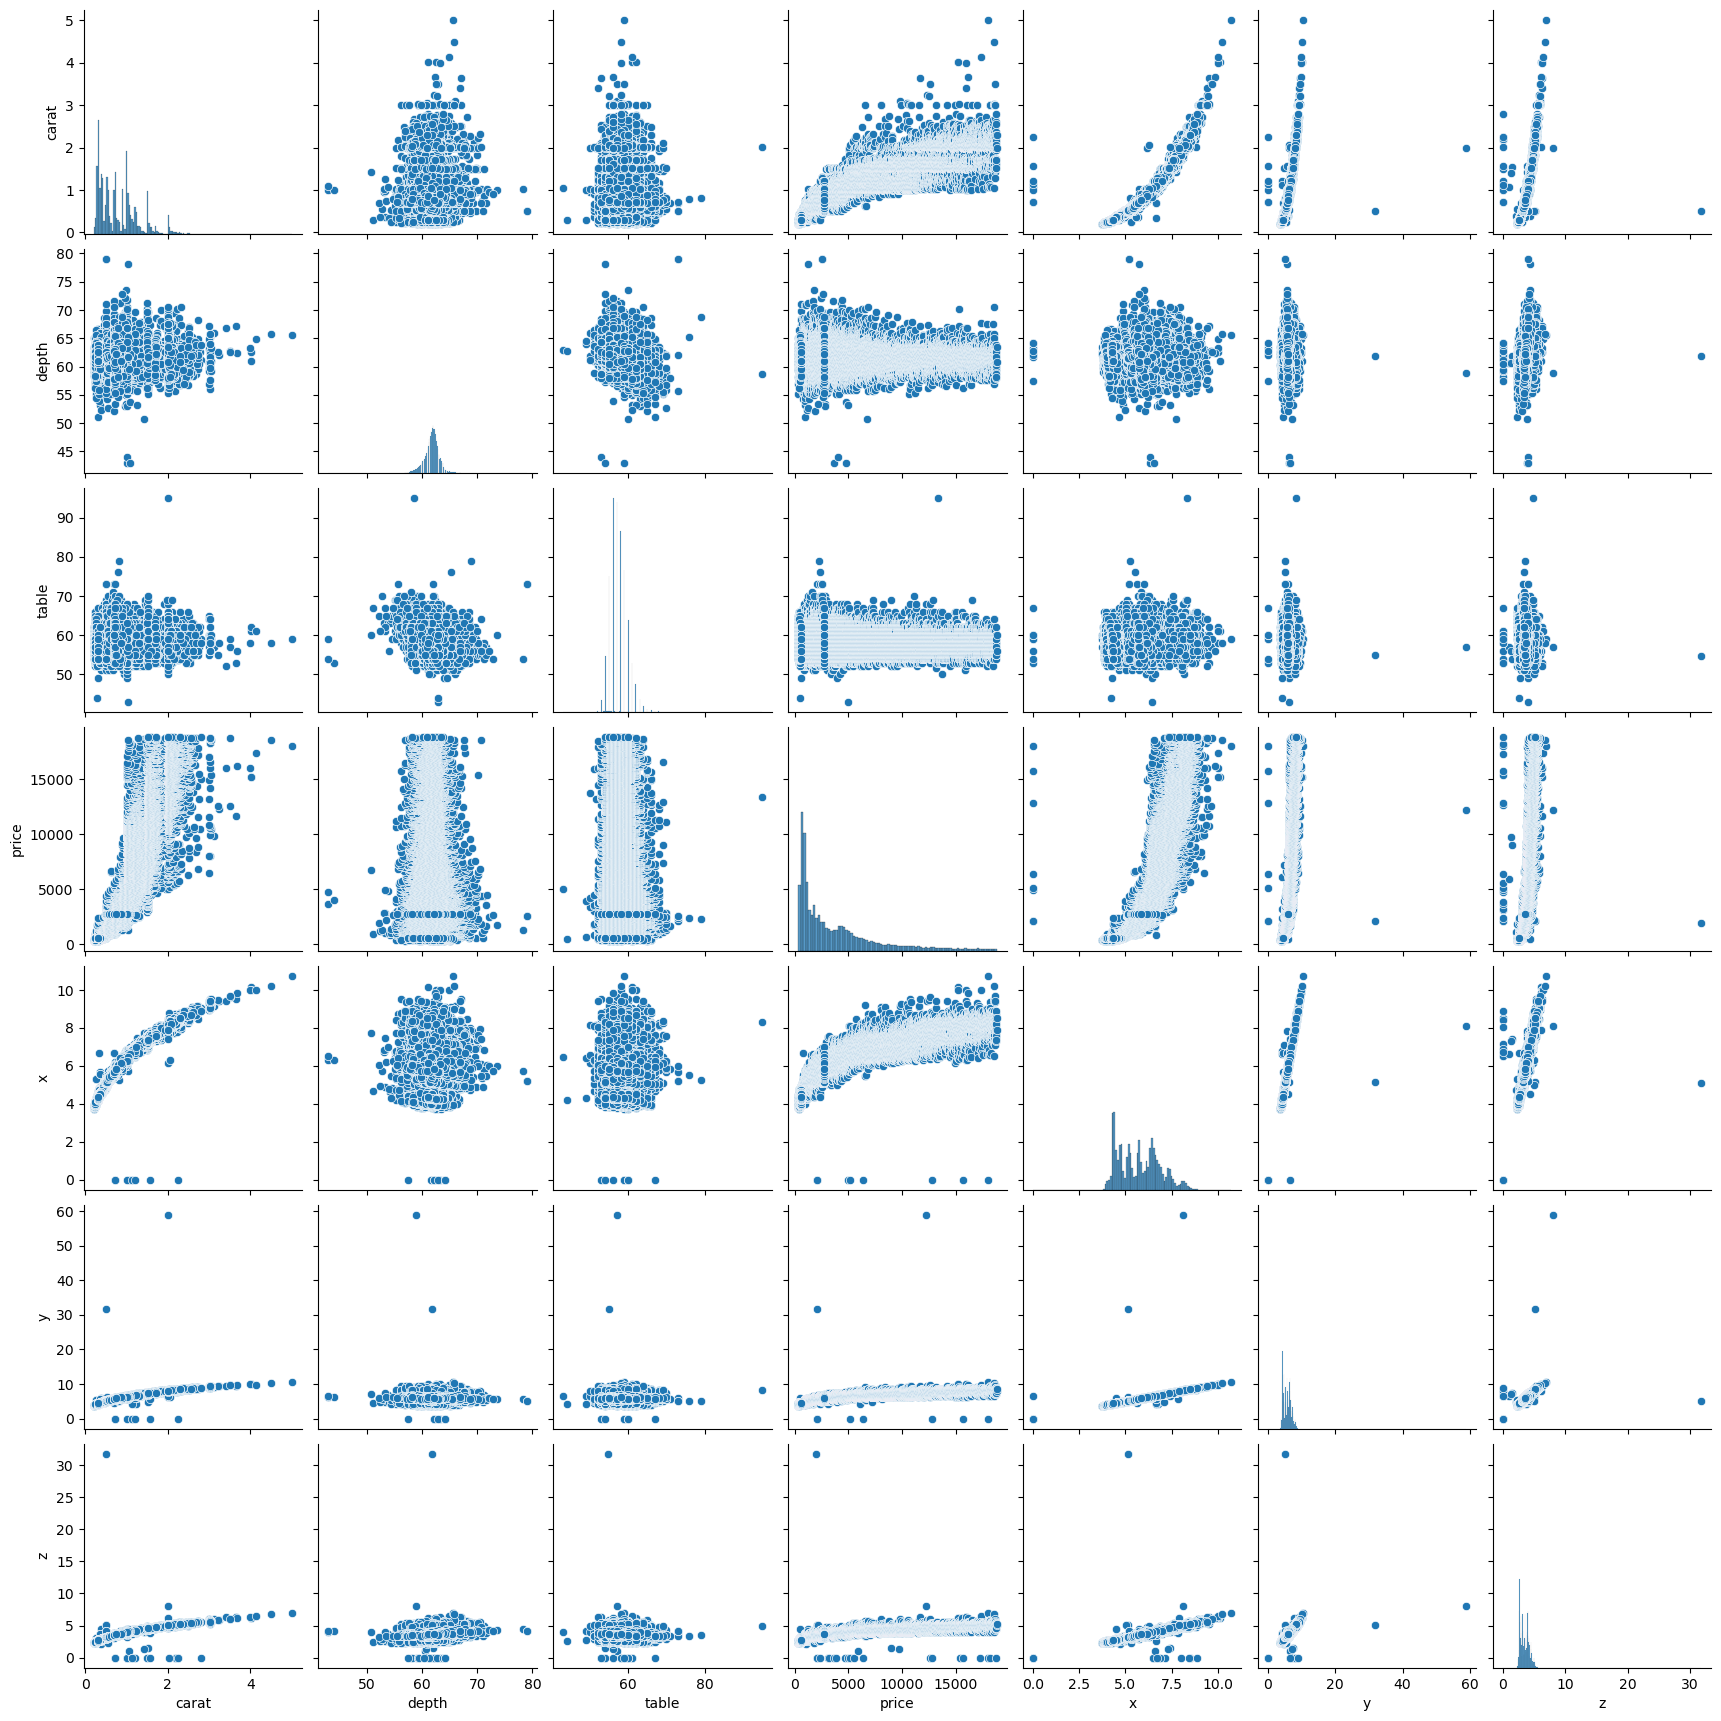

In [4]:
sns.pairplot(data)

<Axes: xlabel='carat', ylabel='price'>

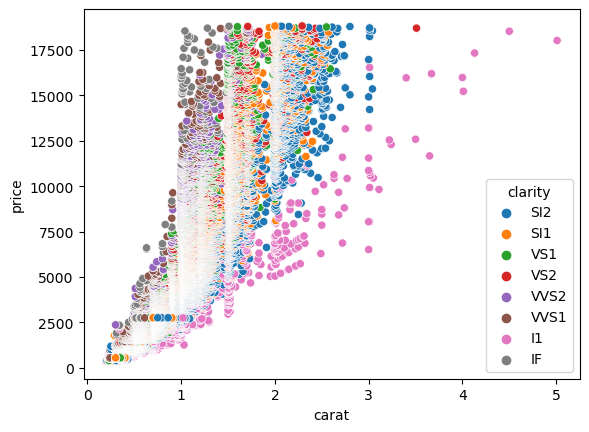

In [5]:
sns.scatterplot(data[['carat', 'price', 'clarity']], x='carat', y='price', hue='clarity')

# Data Converting (Naively)

In [6]:
def convert_diamond_color_to_num(x):
    if x == 'D':
        return 1
    elif x == 'E':
        return 2
    elif x == 'F':
        return 3
    elif x == 'G':
        return 4
    elif x == 'H':
        return 5
    elif x == 'I':
        return 6
    elif x == 'J':
        return 7
    elif x == 'K':
        return 8
    elif x == 'L':
        return 9
    elif x == 'M':
        return 10
    

def convert_clarity_to_num(x):
    if x == 'I3':
        return 1
    elif x == 'I2':
        return 1
    elif x == 'I1':
        return 1
    elif x == ('SI1'):
        return 2
    elif x == 'SI2':
        return 2
    elif x == ('VS2'):
        return 3
    elif x == ('VS1'):
        return 4
    elif x == 'VVS2':
        return 5
    elif x == 'VVS1':
        return 6
    elif x == 'IF':
        return 7

    
def convert_cut_to_num(x):
    if x == 'Fair':
        return 1
    elif x == 'Good':
        return 2
    elif x == 'Very Good':
        return 3
    elif x == 'Premium':
        return 4
    elif x =='Ideal':
        return 5

    
data
#X = data[['carat', 'x', 'y', 'z']]


copy_of_data = data.copy(deep=True)
copy_of_data['color'] = copy_of_data['color'].apply(lambda x: convert_diamond_color_to_num(x))
copy_of_data['clarity'] = copy_of_data['clarity'].apply(lambda x: convert_clarity_to_num(x))
copy_of_data['cut'] = copy_of_data['cut'].apply(lambda x: convert_cut_to_num(x))
copy_of_data



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,1,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


# Making Model variables

In [7]:
X = copy_of_data[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']]
y = copy_of_data[['price']]
y = y['price']
#y['price'].isnull().values.any()
X['carat'].isnull().values.any()
X['cut'].isnull().values.any()
X['color'].isnull().values.any()
X['clarity'].isnull().values.any()


False

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 7)


knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
#knn.score(y_pred, y_test)

In [11]:
#This is wrong because it is not for a continuous model
knn.score(X_train, y_train)

0.9772945807804515

In [12]:
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)    
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)    
    knn_r_acc.append((i, test_score ,train_score))
    df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.954200     0.999938
1    2    0.963600     0.988828
2    3    0.965453     0.984687
3    4    0.966836     0.982000
4    5    0.967232     0.979895
5    6    0.967470     0.978442
6    7    0.967322     0.977295
7    8    0.967241     0.976106
8    9    0.966885     0.975175
9   10    0.966719     0.974260
10  11    0.966645     0.973345
11  12    0.966441     0.972662
12  13    0.966498     0.971930
13  14    0.966073     0.971238
14  15    0.965789     0.970682
15  16    0.965449     0.970151


       True Value   Prediciton        Error
28765         680   660.857143    19.142857
30174         721   940.714286  -219.714286
3650         3438  3806.571429  -368.571429
33942         464   484.000000   -20.000000
53728        2721  2743.857143   -22.857143
11546        5029  4861.285714   167.714286
18268        7418  7593.428571  -175.428571
28643         434   535.000000  -101.000000
4361         3604  5960.142857 -2356.142857
31173         756   707.142857    48.857143
36903         960  1090.000000  -130.000000
31038         749   840.857143   -91.857143
9960         4700  4606.714286    93.285714
10003        4705  5011.142857  -306.142857
1298         2954  2794.428571   159.571429
5654         3881  3652.571429   228.428571
15376         606   568.857143    37.142857
36399         942   922.142857    19.857143
41371        1220  1270.000000   -50.000000
50111        2209  2216.857143    -7.857143
30067         720   611.714286   108.285714
4211         3567  3311.571429  

<Axes: ylabel='Count'>

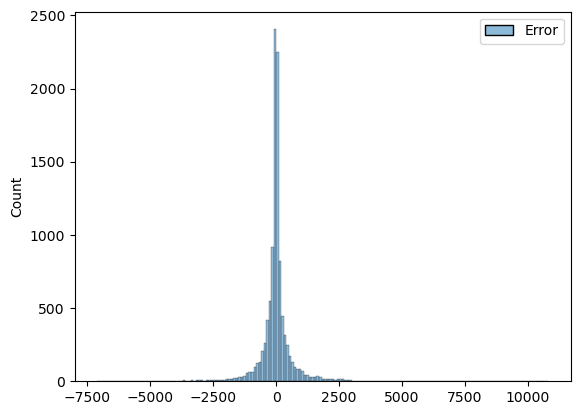

In [13]:
performance = pd.DataFrame({'True Value': y_test,
                           'Prediciton': y_pred,
                           'Error': y_test - y_pred})

print(performance[50:100])
performance.describe()

#sns.pairplot(performance, hue='Error')
sns.histplot(performance[['Error']], binwidth=100)

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.967322060779586

# Root_Mean_Squared_Error

In [15]:
from sklearn.metrics import mean_squared_error

y_actual = y_test.to_frame()
y_actual
mean_squared_error(y_test, y_pred, squared=False)

712.5774000062021

# Mean_Absolute_Error

In [16]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

357.28045712166954

# Average Price 

In [17]:
y_test.mean()

3936.0816648127548

# Median Price

In [18]:
y_test.median()

2495.5

# Plotting

<Axes: >

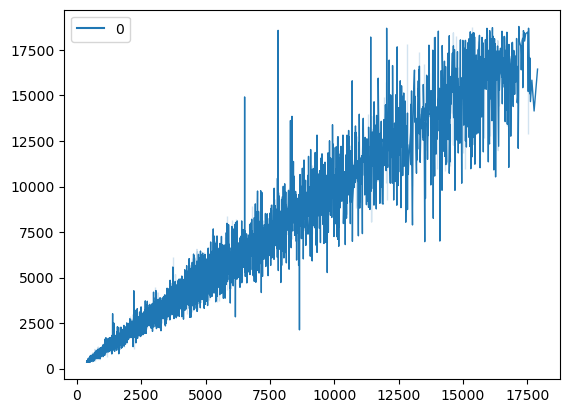

In [19]:
plot_df = pd.DataFrame(y_actual[['price']].to_numpy(), y_pred)

plot_df

sns.lineplot(data=plot_df, palette="tab10", linewidth=1)

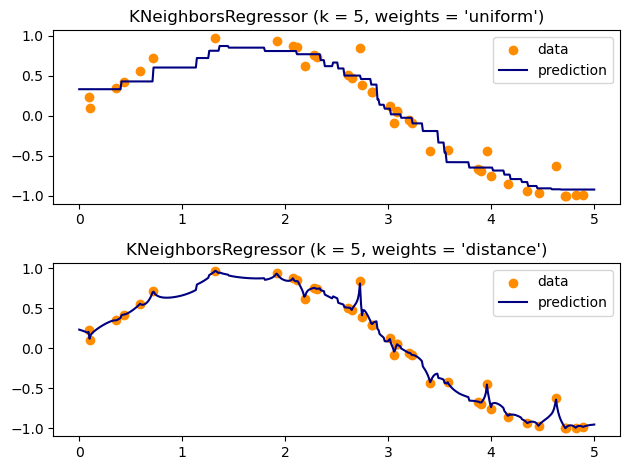

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))



n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [21]:
performance['Prediciton']

2714      442.285714
14653    5292.571429
52760    2432.571429
48658     592.714286
14812    6850.142857
            ...     
49568    2445.571429
32163     758.571429
52459    2470.000000
15265    5433.714286
43028    1206.285714
Name: Prediciton, Length: 10788, dtype: float64

<Axes: xlabel='True Value', ylabel='Error'>

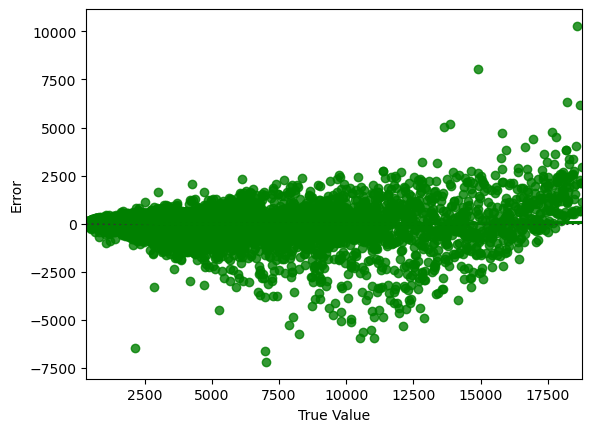

In [22]:
sns.residplot(x=performance['True Value'], y=performance['Error'], lowess=True, color="g")

In [23]:
performance.query('Error < 250 & Error > -250')

,True Value,Prediciton,Error
2714,564,442.285714,121.714286
52760,2562,2432.571429,129.428571
48658,537,592.714286,-55.714286
16738,611,721.571429,-110.571429
40732,1162,1005.285714,156.714286
...,...,...,...
617,2839,2864.857143,-25.857143
50049,2200,2439.714286,-239.714286
32163,787,758.571429,28.428571
52459,2516,2470.000000,46.000000


In [24]:
len(performance)

10788

In [25]:
6953/10788

0.6445124212087505